In [42]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [43]:
def Prblm(a, b, c, d, e):
    Prblm = (a and b and (not c or (d and (not e))))
    if Prblm == True:
        Prblm = 1.0
    else :
        Prblm = 0.0
    return Prblm

n = 5
interpret = int(np.sqrt(n))

In [44]:
import numpy as np
#matrix
m = np.eye(32,32)    
for a in [0,1]:
    for b in [0,1]:
        for c in [0,1]:
            for d in [0,1]:
                for e in [0,1]:
                    p = (2**4)*a + (2**3)*b + (2**2)*c + (2**1)*d + (2**0)*e
                    k = Prblm(a, b, c, d, e)
                    if k == 1.0:
                        m[p,p] = -1.0
                    else:
                        m[p,p] = 1.0
print(m)

[[ 1.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ...  0.  0.  1.]]


In [45]:
# Oracle
oracle = QuantumCircuit(5, name = "Oracle")
oracle.unitary(m, [0,1,2,3,4], label="or")
oracle.draw()

┌─────┐
q_0: ┤0    ├
     │     │
q_1: ┤1    ├
     │     │
q_2: ┤2 or ├
     │     │
q_3: ┤3    ├
     │     │
q_4: ┤4    ├
     └─────┘

In [46]:
#Diffuser
reflection = QuantumCircuit(5,name='reflection')
reflection.h([0,1,2,3,4])
reflection.x([0,1,2,3,4])
reflection.barrier()
reflection.h([4])
reflection.mct(list(range(4)), 4) 
reflection.h(4)
reflection.barrier()
reflection.x([0,1,2,3,4]) 
reflection.h([0,1,2,3,4]) 
reflection.draw()

┌───┐┌───┐ ░                 ░ ┌───┐┌───┐
q_0: ┤ H ├┤ X ├─░────────■────────░─┤ X ├┤ H ├
     ├───┤├───┤ ░        │        ░ ├───┤├───┤
q_1: ┤ H ├┤ X ├─░────────■────────░─┤ X ├┤ H ├
     ├───┤├───┤ ░        │        ░ ├───┤├───┤
q_2: ┤ H ├┤ X ├─░────────■────────░─┤ X ├┤ H ├
     ├───┤├───┤ ░        │        ░ ├───┤├───┤
q_3: ┤ H ├┤ X ├─░────────■────────░─┤ X ├┤ H ├
     ├───┤├───┤ ░ ┌───┐┌─┴─┐┌───┐ ░ ├───┤├───┤
q_4: ┤ H ├┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─┤ X ├┤ H ├
     └───┘└───┘ ░ └───┘└───┘└───┘ ░ └───┘└───┘

In [47]:
g_circuit = QuantumCircuit(5)
g_circuit.h([0,1,2,3,4])
for i in range(1):
    g_circuit.append(oracle, [0,1,2,3,4])
    g_circuit.append(reflection, [0,1,2,3,4])

g_circuit.measure_all()
g_circuit.draw()

┌───┐┌─────────┐┌─────────────┐ ░ ┌─┐            
   q_0: ┤ H ├┤0        ├┤0            ├─░─┤M├────────────
        ├───┤│         ││             │ ░ └╥┘┌─┐         
   q_1: ┤ H ├┤1        ├┤1            ├─░──╫─┤M├─────────
        ├───┤│         ││             │ ░  ║ └╥┘┌─┐      
   q_2: ┤ H ├┤2 Oracle ├┤2 reflection ├─░──╫──╫─┤M├──────
        ├───┤│         ││             │ ░  ║  ║ └╥┘┌─┐   
   q_3: ┤ H ├┤3        ├┤3            ├─░──╫──╫──╫─┤M├───
        ├───┤│         ││             │ ░  ║  ║  ║ └╥┘┌─┐
   q_4: ┤ H ├┤4        ├┤4            ├─░──╫──╫──╫──╫─┤M├
        └───┘└─────────┘└─────────────┘ ░  ║  ║  ║  ║ └╥┘
meas: 5/═══════════════════════════════════╩══╩══╩══╩══╩═
                                           0  1  2  3  4

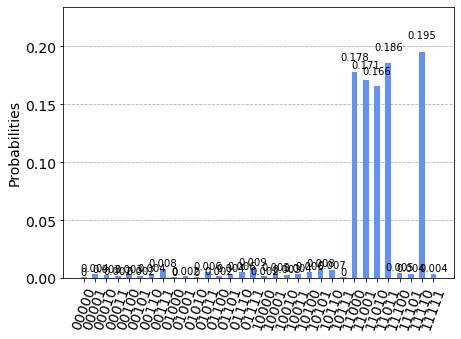

In [41]:
sim_aer = Aer.get_backend('aer_simulator')
g_circuit = transpile(g_circuit, sim_aer)
qobj = assemble(g_circuit)
results = sim_aer.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)